In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
# load corrections to Pk
lcdm_c = np.genfromtxt("/Users/aizhan.akh/Documents/Projects/PT-check/code/lcdm_P_1loop.dat")
dmeff0_c = np.genfromtxt("/Users/aizhan.akh/Documents/Projects/PT-check/code/dmeff_0_P_1loop.dat")
dmeff2_c = np.genfromtxt("/Users/aizhan.akh/Documents/Projects/PT-check/code/dmeff_2_P_1loop.dat")
dmeff_2_c = np.genfromtxt("/Users/aizhan.akh/Documents/Projects/PT-check/code/dmeff_-2_P_1loop.dat")
kk = lcdm_c[:, 0]
Pk = lcdm_c[:, 1]
kk1 = dmeff0_c[:, 0]
Pk1 = dmeff0_c[:, 1]
kk2 = dmeff2_c[:, 0]
Pk2 = dmeff2_c[:, 1]
kk3 = dmeff_2_c[:,0]
Pk3 = dmeff_2_c[:,1]


In [11]:
# load actual Pk
lcdm = np.genfromtxt("/Users/aizhan.akh/Documents/Projects/PT-check/class/test_output/lcdm_pk.dat")[:,1]
kk_lcdm = np.genfromtxt("/Users/aizhan.akh/Documents/Projects/PT-check/class/test_output/lcdm_pk.dat")[:,0]
dmeff0 = np.genfromtxt("/Users/aizhan.akh/Documents/Projects/PT-check/class/test_output/dmeff_0_pk.dat")[:,1]
kk_dmeff0 = np.genfromtxt("/Users/aizhan.akh/Documents/Projects/PT-check/class/test_output/dmeff_0_pk.dat")[:,0]
dmeff2 = np.genfromtxt("/Users/aizhan.akh/Documents/Projects/PT-check/class/test_output/dmeff_2_pk.dat")[:,1]
kk_dmeff2 = np.genfromtxt("/Users/aizhan.akh/Documents/Projects/PT-check/class/test_output/dmeff_2_pk.dat")[:,0]
dmeff_2 = np.genfromtxt("/Users/aizhan.akh/Documents/Projects/PT-check/class/test_output/dmeff_-2_pk.dat")[:,1]
kk_dmeff_2 = np.genfromtxt("/Users/aizhan.akh/Documents/Projects/PT-check/class/test_output/dmeff_-2_pk.dat")[:,0]

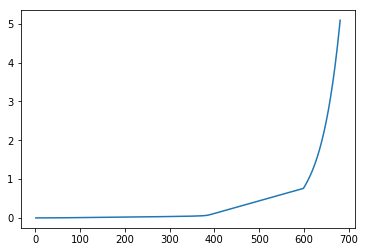

In [12]:
len1 = np.linspace(1, 681, 681)
plt.figure()
plt.yscale("linear")
plt.plot(len1, kk_lcdm)
plt.show()


In [13]:
# calculate new spectra
lcdm_n = lcdm + Pk
dmeff0_n = dmeff0 + Pk1
dmeff2_n = dmeff2 + Pk2
dmeff_2_n = dmeff_2 + Pk3

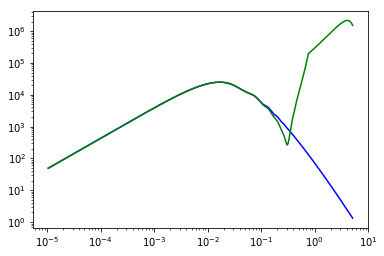

In [14]:
# direct addition does not work properly
plt.figure()
plt.xscale('log');plt.yscale('log'); #plt.ylim(-10**5,10**5)
#plt.xlabel(r'$\ell$')
#plt.ylabel(r'$ C_\ell^\mathrm{\Phi\Phi}$')
#plt.plot(kk,lcdm_n,'g-')
plt.plot(kk_lcdm,lcdm, 'b-')
plt.plot(kk_lcdm, lcdm_n,'g-' )
plt.show()

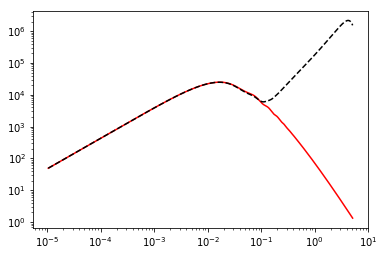

In [15]:
# try interpolation
# we want to add Pk to lcdm values which correspond to particular kk values
# so we need to interpolte lcdm values for those particular values of kk
lcdm_interp = np.interp(kk, kk_lcdm, lcdm)
lcdm_new = Pk + lcdm_interp
plt.figure()
plt.xscale('log');plt.yscale('log')
plt.plot(kk_lcdm,lcdm, 'r-')
plt.plot(kk, lcdm_new,'k--' )
plt.show()

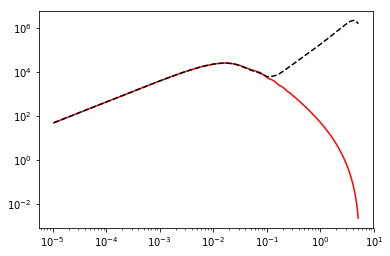

In [16]:
# same interpolation with dmeff sets
dmeff0_interp = np.interp(kk1, kk_dmeff0, dmeff0)
dmeff0_new = Pk1 + dmeff0_interp
plt.figure()
plt.xscale('log');plt.yscale('log')
plt.plot(kk_dmeff0, dmeff0, 'r-')
plt.plot(kk1, dmeff0_new,'k--' )
plt.show()

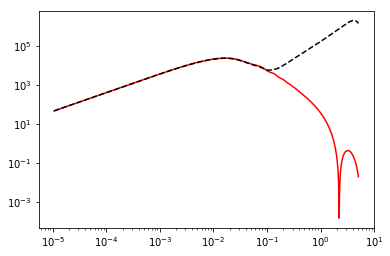

In [17]:
# same interpolation with dmeff sets
dmeff2_interp = np.interp(kk2, kk_dmeff2, dmeff2)
dmeff2_new = Pk2 + dmeff2_interp
plt.figure()
plt.xscale('log');plt.yscale('log')
plt.plot(kk_dmeff2, dmeff2, 'r-')
plt.plot(kk2, dmeff2_new,'k--' )
plt.show()

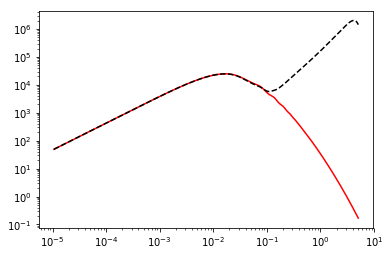

In [18]:
# same interpolation with dmeff sets
dmeff_2_interp = np.interp(kk3, kk_dmeff_2, dmeff_2)
dmeff_2_new = Pk3 + dmeff_2_interp
plt.figure()
plt.xscale('log');plt.yscale('log')
plt.plot(kk_dmeff_2, dmeff_2, 'r-')
plt.plot(kk3, dmeff_2_new,'k--' )
plt.show()

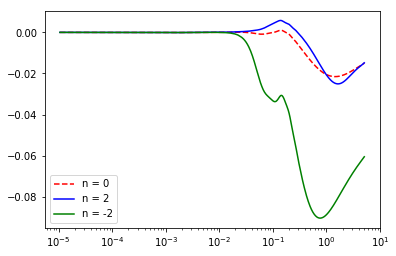

In [19]:
# get residual spectra for all these dmeff models

# first, interpolate
lcdm_interp1 = np.interp(kk1, kk, lcdm_new)
lcdm_interp2 = np.interp(kk2, kk, lcdm_new)
lcdm_interp3 = np.interp(kk3, kk, lcdm_new)

# then, find residual spectra
res_dmeff0 = (dmeff0_new - lcdm_interp1)/lcdm_interp1
res_dmeff2 = (dmeff2_new - lcdm_interp2)/lcdm_interp2
res_dmeff_2 = (dmeff_2_new - lcdm_interp3)/lcdm_interp3

# finally, plot them all in one figure
plt.figure()
plt.xscale('log');plt.yscale('linear')
plt.plot(kk1, res_dmeff0, 'r--', label = "n = 0")
plt.plot(kk2, res_dmeff2, 'b-', label = "n = 2")
plt.plot(kk3, res_dmeff_2,'g-', label = "n = -2")
plt.legend()
plt.show()

